## Geomagnetic storm magnitude in a historic context

In [7]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from datetime import timedelta
import seaborn as sns
import urllib
import pandas as pd
import os
import sys
import importlib


import plotly.graph_objects as go
import numpy as np
from plotly.offline import iplot, init_notebook_mode


#import 
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging


outputdir='results/icme_rate/'

##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    from config_server import data_path
    matplotlib.use('Agg') 
   
        
#mac
if sys.platform =='darwin':  
    print('system is mac')
    from config_local import data_path    
    #matplotlib.use('Agg') 
    %matplotlib inline     

print(data_path)


os.system('jupyter nbconvert --to script geomagnetic_storms.ipynb')    




system is mac
/Users/chris/python/data/insitu_python/


[NbConvertApp] Converting notebook geomagnetic_storms.ipynb to script
[NbConvertApp] Writing 5121 bytes to geomagnetic_storms.py


0

### get Dst data

saved as  results/icme_rate/OMNI2_2021_Sep_06_2023_Sep_06.png
saved as  results/icme_rate/OMNI2_2021_Sep_06_2023_Sep_06.pdf
saved as  results/icme_rate/OMNI2_now.png
saved as  results/icme_rate/OMNI2_now.pdf


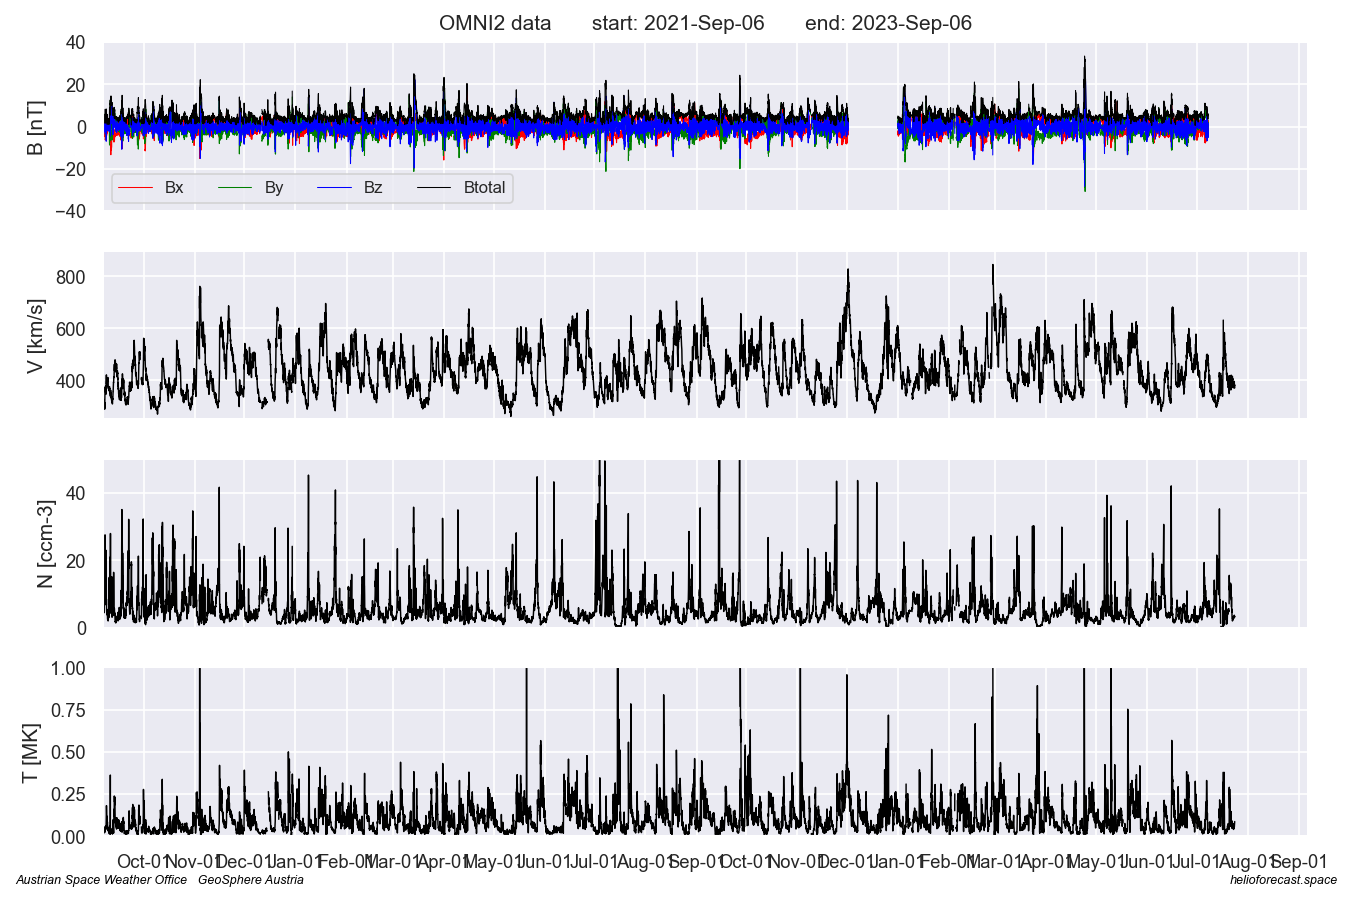

In [8]:
##get omni dst data
get_new_data=0

fileomni="omni_1963_now.p"
if get_new_data: hd.save_omni_data(data_path,fileomni)
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

start=datetime.datetime.utcnow() - datetime.timedelta(days=2*365)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update(o, start, end,'OMNI2',outputdir,now=True)



#get current dst
filenoaa='noaa_dst_last_300files_now.p'
n=pickle.load(open(data_path+filenoaa, "rb" ) )  

### plot Dst

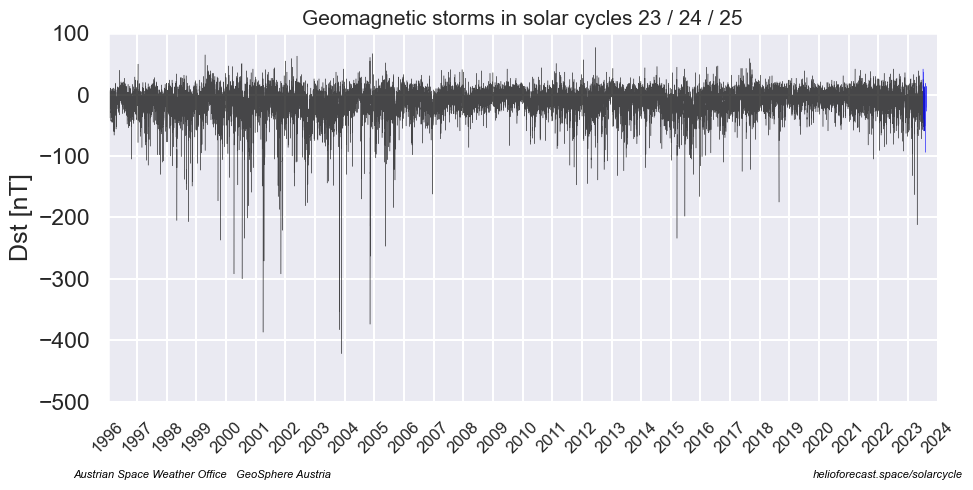

In [9]:
years=np.arange(1995,2040) 
yearly_start_times=[datetime.datetime(year,1,1) for year in years]

sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(10,5),dpi=100)

ax1.plot(o.time,o.dst,color='k',linewidth=0.3,alpha=0.7)
ax1.plot(n.time,n.dst,color='b',linewidth=0.3,alpha=0.7)

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')


ax1.set_xlim(start,end)
ax1.set_ylim(-500,100)
plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(yearly_start_times, fontsize=12,rotation=45) 

ax1.set_xlim(datetime.datetime(1996,1,1),datetime.datetime(2024,1,1))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Geomagnetic storms in solar cycles 23 / 24 / 25',fontsize=15)

fsize=12
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space/solarcycle', color='black', ha='right',fontsize=fsize-4, style='italic')

plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_all.png',dpi=150)
plt.savefig(outputdir+'geomagnetic_storm_all.pdf',dpi=150)



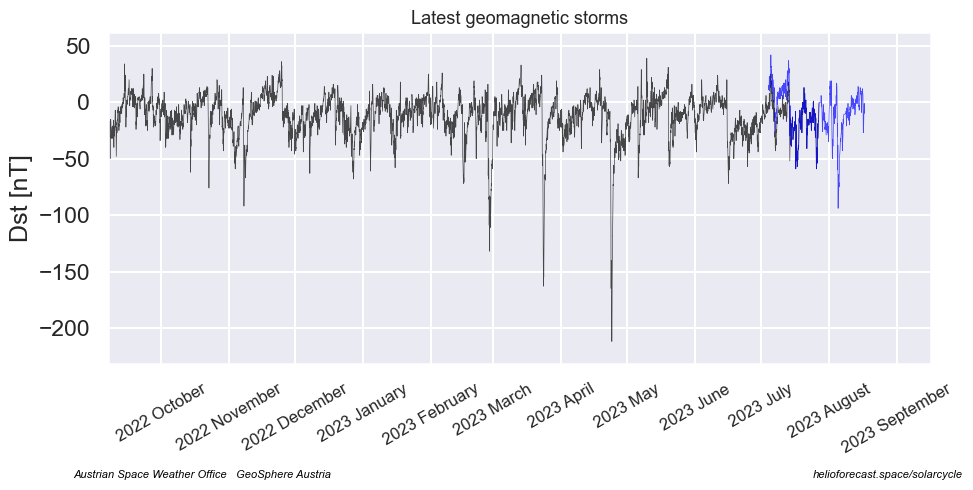

In [10]:


years=np.arange(1995,2040) 
months=np.arange(1,13)
monthly_start_times=[datetime.datetime(year,month,1) for year in years for month in months]


sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax1=plt.subplots(1,figsize=(10,5),dpi=100)


ax1.plot(o.time,o.dst,color='k',linewidth=0.5,alpha=0.7)
ax1.plot(n.time,n.dst,color='b',linewidth=0.5,alpha=0.7)

#ax1.plot(o.time,np.zeros(np.size(o.time))-187, 'g')


#stack both OMNI and NOAA Dst and determine min max for last year
plotmin=np.nanmin(np.hstack([o.dst,n.dst])[-365*24:-1])
plotmax=np.nanmax(np.hstack([o.dst,n.dst])[-365*24:-1])


ax1.set_xlim(start,end)
ax1.set_ylim(plotmin-20,plotmax+20)
plt.ylabel('Dst [nT]')

ax1.xaxis_date()
myformat = mdates.DateFormatter('%Y %B')
ax1.xaxis.set_major_formatter(myformat)
plt.xticks(monthly_start_times, fontsize=12,rotation=30) 


ax1.set_xlim(datetime.datetime.utcnow()-datetime.timedelta(days=365),datetime.datetime.utcnow()+datetime.timedelta(days=10))

#ax1.set_xlim(datetime.datetime(2023,1,1),datetime.datetime(2024,1,1))

#plt.title('Geomagnetische Stürme 2015-2023')
plt.title('Latest geomagnetic storms',fontsize=13)

fsize=12
plt.figtext(0.09,0.01,'Austrian Space Weather Office   GeoSphere Austria', color='black', ha='left',fontsize=fsize-4, style='italic')
plt.figtext(0.98,0.01,'helioforecast.space/solarcycle', color='black', ha='right',fontsize=fsize-4, style='italic')

plt.tight_layout()

plt.savefig(outputdir+'geomagnetic_storm_latest.png',dpi=150)
plt.savefig(outputdir+'geomagnetic_storm_latest.pdf',dpi=150)



##histogram

#### looking into the data

In [5]:
#https://plotly.com/python/


data_lookup=0


if data_lookup > 0:

    #init_notebook_mode(connected = True)
    init_notebook_mode(connected = False)

    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=o.time, y=o.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()

In [6]:
if data_lookup > 0:
    
    fig=plt.figure(figsize=(8,10), dpi=150)
    x = np.arange(10)
    fig = go.Figure(data=go.Scatter(x=n.time, y=n.dst))
    fig.write_html(f'geomagnetic_storms.html')
    fig.show()
